# <center> Lab 1 Examples 
## <center>    Limits
    
In this lab, we will take a look a graphical and numerical approximation of limits. We will also take a look on how to precisely evaluate limits using Jupyter.

**Video**: https://youtu.be/Qdwr7WqCVIg>
    
We start with importing needed libraries. We will use NumPy, SymPy and Matlplotlib.
    

In [10]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt



#### Example 1A
    
Consider the following limit $$\lim_{x \rightarrow 9}\frac{\sqrt{x}-3}{x-9}.$$

First, let's create the function:


In [11]:
def f(x):
    return (np.sqrt(x)-3)/(x-9)

We want to investigate our limit graphically and numerically. To do that, we will create two sequences of numbers. One approaching to 9 from the left and the other form the right. There are many ways to do this, but I will create a sequances that approach our value exponentially:

In [12]:
L=np.arange(1,10,1)
base_seq=0.7**L
#base_seq is a small sequence that approach zero


xRight=9+base_seq
xLeft=9-base_seq
# xRight and xLeft are the sequences that approach 9 from the corresponing sides.


print("Right Seq = ", xRight)
print("Left Seq = ", xLeft)

Right Seq =  [9.7        9.49       9.343      9.2401     9.16807    9.117649
 9.0823543  9.05764801 9.04035361]
Left Seq =  [8.3        8.51       8.657      8.7599     8.83193    8.882351
 8.9176457  8.94235199 8.95964639]


Let's plot the values of our sequences. Note, when you plot points in matplotlib using plot, your points will get connected by line segments. So, to see actual points, we will add `marker="o"` property.

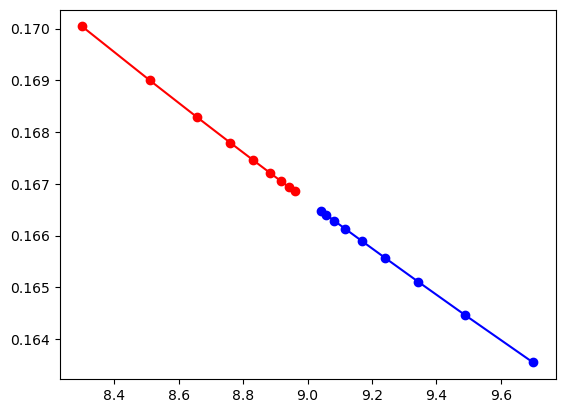

In [18]:
fig=plt.figure()
plt.plot(xLeft, f(xLeft),marker="o",color='red')
plt.plot(xRight, f(xRight),marker="o",color='blue')


To see the actual values, let's redraw this and this time also add horizontal lines at the last values. Recall, to get the last value of the sequence we can use negative indecies (in this case -1).

To plot horizontal lines, we can use `hlines` command from matplotlib. The `xLeft[0], xRight[0]` part indicates the x-coordinates of start and end of our horizonalt lines. We are using the first values of xLeft and xRight sequences. You can also use actual numbers instead when needed.

Finally, we will also make our y-coordinate ticks more precise.

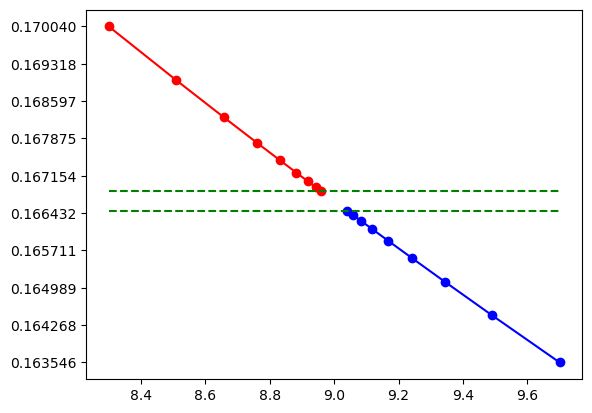

In [19]:

fig=plt.figure()
plt.plot(xLeft, f(xLeft),marker="o",color='red')
plt.plot(xRight, f(xRight),marker="o",color='blue')


plt.hlines(f(xLeft[-1]), xLeft[0], xRight[0], colors ='green', linestyles = 'dashed')
plt.hlines(f(xRight[-1]), xLeft[0], xRight[0], colors = 'green', linestyles = 'dashed')

plt.yticks(np.linspace(f(xRight[0]),f(xLeft[0]), 10))  # 10 is the amount of ticks between f(xRight[0]) and f(xLeft[0])

plt.show()

We can see our limit approaches to about 0.1667 or so.

If we wanted to get even better approximation, we can change our sequance to either have more values or approach faster. Lets do both:

In [20]:
L2=np.arange(1,15,1)
base_seq2=0.4**L2
# L2 has 15 values now and in base_seq2 we take powers of 0.4 which will it it decrease faster.


xRight2=9+base_seq2
xLeft2=9-base_seq2


print("Right Seq = ", xRight2)
print("Left Seq = ", xLeft2)

Right Seq =  [9.4        9.16       9.064      9.0256     9.01024    9.004096
 9.0016384  9.00065536 9.00026214 9.00010486 9.00004194 9.00001678
 9.00000671 9.00000268]
Left Seq =  [8.6        8.84       8.936      8.9744     8.98976    8.995904
 8.9983616  8.99934464 8.99973786 8.99989514 8.99995806 8.99998322
 8.99999329 8.99999732]


Now we plot:

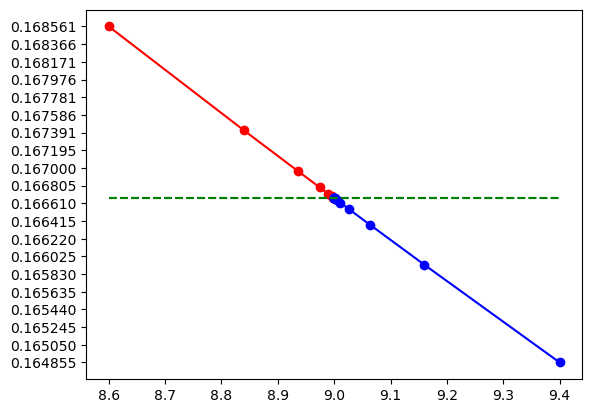

In [21]:

fig=plt.figure()

plt.plot(xLeft2, f(xLeft2),marker="o",color='red')
plt.plot(xRight2, f(xRight2),marker="o",color='blue')


plt.hlines(f(xLeft2[-1]), xLeft2[0], xRight2[0], colors ='green', linestyles = 'dashed')
plt.hlines(f(xRight2[-1]), xLeft2[0], xRight2[0], colors = 'green', linestyles = 'dashed')

plt.yticks(np.linspace( f(xRight2[0]),f(xLeft2[0]), 20))

plt.show()

As you can see, our left and right horizontal lines are so close, that they appear to be on top of each other. Our limit seems to be arround 0.16667. If I were to guess, I would probably guess 0.166.... or 1/6

#### Example 1B

In the second part of this Example 1, we will use SymPy library to get precise value for our limit. Two major things to note: 

1. SymPy is a symbolic library. This means it knows how to manipulate variables and provide answers with variables in it. 

2. It doesn't work that well with NumPy and Matplotlib. It has it's own functions. For example, np.sin() and sp.sin() cannot be used interchangeably.

All of this means that usually we need to recreate functions using SymPy if we already had one using NumPy. There is a way to convert SymPy function into NumPy, but it can only be used for regular functions (not piecewise function for example).

Finally, to use variables properly with SymPy, we need to define what is our variable. In this example, we will use x as a variable:

In [22]:
sp.var('x')

x

In [23]:
fsp = (sp.sqrt(x)-3)/(x-9)
fsp

(sqrt(x) - 3)/(x - 9)

Notice, we used `sp.sqrt` here. We also didn't use `def`. This is because in this definition x is not a number or list of numbers, but just a symbol representing variable.

Now lets find the limit. In this command `'+-'` means it is a two-sided limit. We can also use just `'-'` or `'+'` for one sided limits, if we need to.

In [24]:
sp.limit(fsp, x, 9, '+-')

1/6

So the actual value of the limit is 1/6 as we have guessed.

Finally, to convert fsp to a regular NumPy type function we can use `lambdify`. This will be helpful in the future, when we need to plot functions that were created or manipulated by SymPy:

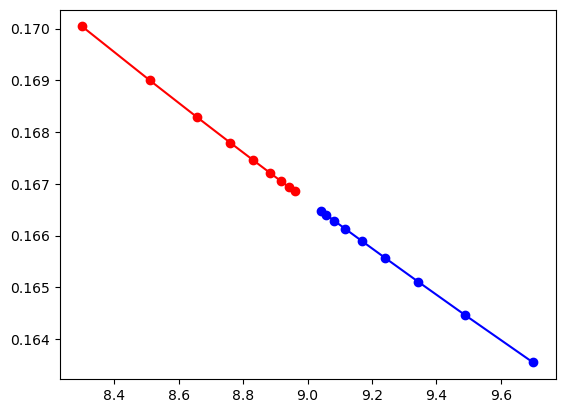

In [27]:
fnp=sp.lambdify(x,fsp,'numpy')

fig=plt.figure()
plt.plot(xLeft, fnp(xLeft),marker="o",color='red')
plt.plot(xRight, fnp(xRight),marker="o",color='blue')
plt.show()

#### Example 2A

In this example, we will consider piece-wise functions. We will start with NumPy first. 

Suppose $$g(x) = \begin{cases} 
          -3x+10 & x <4 \\
          sin(x)-2 & x \geq 4 
       \end{cases}
$$
   
    
To define piecewise function we can use `if..then` statements and then use `np.vectorize()` command:

In [28]:
def g(x):
    if x<4: 
        return -3*x+10
    else:
        return np.sin(x)-2

g=np.vectorize(g)

Let's take a sequence of number approaching to $x=4$ on both sides and plot it, just like we did in the example 1. We will reuse our `base_seq` from Example 1:

In [29]:
xRight=4+base_seq
xLeft=4-base_seq

Now let's plot:

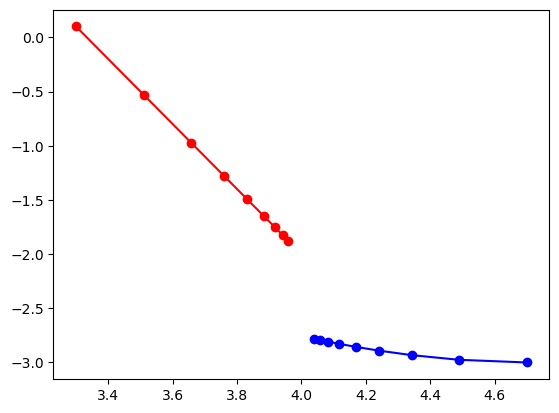

In [32]:
fig=plt.figure()
plt.plot(xLeft, g(xLeft),marker="o",color='red')
plt.plot(xRight, g(xRight),marker="o",color='blue')
plt.show()

It looks like the limit doesn't exist, since the function seem to approach to two different values on the left and the right.

#### Example 2B

Now let's see what we can do with SymPy. 

SymPy has a special command to create piecewise function. 

In [33]:
gsp=sp.Piecewise( (-3*x+10,x<4), (sp.sin(x)-2,x>4))
gsp

Piecewise((10 - 3*x, x < 4), (sin(x) - 2, x > 4))

Notice that we didn't use $x \geq 4$. Instead we used a strict inequality. This is because SymPy will try to use direct substitution first, and so if we had $\geq$ sign there, both right and left limit would be the same ( equal to 0). To avoid this, we will remove the value we are interested in. Now that direct substitution will not work, and SymPy will evaluate limits properly.

Now let's calculate left and right limits at $x=4$:

In [34]:
sp.limit(gsp,x,4,'-')

-2

In [35]:
sp.limit(gsp,x,4,'+')

-2 + sin(4)

This is not a nice answer if we want to compare numbers. To convert this answer into decimal notation, we can use `sp.N()` command. This is very useful command. It can give you decimal approximation of a number when precise value is impossible to get.

In [36]:
sp.N(sp.limit(gsp,x,4,'+'))

-2.75680249530793

What would happen if we tried to find two-sided limit? SymPy will get angry:

In [37]:
sp.limit(gsp,x,4,'+-')

ValueError: The limit does not exist since left hand limit = -2 and right hand limit = -2 + sin(4)